In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import numpy as np
from pandas.plotting import autocorrelation_plot
from pmdarima.utils import decomposed_plot
from pmdarima.arima import auto_arima

import statsmodels
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from pandas.util._decorators import Appender

import math
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [2]:
df = pd.read_csv(r"C:\Users\godbo\Desktop\Crayon\Walmart.csv")

In [3]:
df.head(10)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31        2.57   
1      1  12-02-2010    1641957.44             1        38.51        2.55   
2      1  19-02-2010    1611968.17             0        39.93        2.51   
3      1  26-02-2010    1409727.59             0        46.63        2.56   
4      1  05-03-2010    1554806.68             0        46.50        2.62   
5      1  12-03-2010    1439541.59             0        57.79        2.67   
6      1  19-03-2010    1472515.79             0        54.58        2.72   
7      1  26-03-2010    1404429.92             0        51.45        2.73   
8      1  02-04-2010    1594968.28             0        62.27        2.72   
9      1  09-04-2010    1545418.53             0        65.86        2.77   

     CPI  Unemployment  
0 211.10          8.11  
1 211.24          8.11  
2 211.29          8.11  
3 211.32          8.11  
4 211.35          8.11  
5 211.38          8.11  
6 211.22          8.11  
7 211.02          8.11  
8 210.82          7.81  
9 210.62          7.81

In [4]:
df.tail(10)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
6425     45  24-08-2012     718232.26             0        72.62        3.83   
6426     45  31-08-2012     734297.87             0        75.09        3.87   
6427     45  07-09-2012     766512.66             1        75.70        3.91   
6428     45  14-09-2012     702238.27             0        67.87        3.95   
6429     45  21-09-2012     723086.20             0        65.32        4.04   
6430     45  28-09-2012     713173.95             0        64.88        4.00   
6431     45  05-10-2012     733455.07             0        64.89        3.98   
6432     45  12-10-2012     734464.36             0        54.47        4.00   
6433     45  19-10-2012     718125.53             0        56.47        3.97   
6434     45  26-10-2012     760281.43             0        58.85        3.88   

        CPI  Unemployment  
6425 191.34          8.68  
6426 191.46          8.68  
6427 191.58          8.68  
6428 191.70          8.68  
6429 191.86          8.68  
6430 192.01          8.68  
6431 192.17          8.67  
6432 192.33          8.67  
6433 192.33          8.67  
6434 192.31          8.67

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

(array([14610., 14730., 14853., 14975., 15095., 15218., 15340., 15461.,
        15584., 15706.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

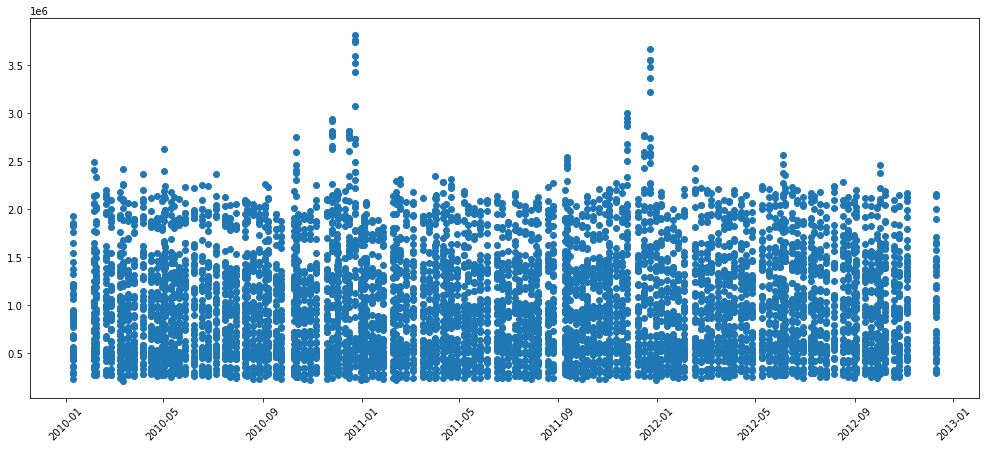

In [8]:
plt.figure(figsize=(17, 7))
plt.scatter(df['Date'], df['Weekly_Sales'])
plt.xticks(rotation=45)

<AxesSubplot:xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

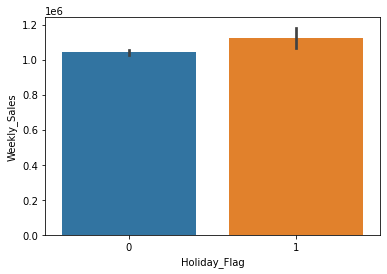

In [9]:
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=df)

In [10]:
df_holiday = df.loc[df['Holiday_Flag']==True]
df_holiday['Date'].unique() 

array(['2010-12-02T00:00:00.000000000', '2010-10-09T00:00:00.000000000',
       '2010-11-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-11-02T00:00:00.000000000', '2011-09-09T00:00:00.000000000',
       '2011-11-25T00:00:00.000000000', '2011-12-30T00:00:00.000000000',
       '2012-10-02T00:00:00.000000000', '2012-07-09T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [11]:
df.sort_values(by='Weekly_Sales',ascending=False).head(5)

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
1905     14 2010-12-24    3818686.45             0        30.59        3.14   
2763     20 2010-12-24    3766687.43             0        25.17        3.14   
1333     10 2010-12-24    3749057.69             0        57.06        3.24   
527       4 2011-12-23    3676388.98             0        35.92        3.10   
1762     13 2010-12-24    3595903.20             0        34.90        2.85   

        CPI  Unemployment  
1905 182.54          8.72  
2763 204.64          7.48  
1333 126.98          9.00  
527  129.98          5.14  
1762 126.98          7.79

In [12]:
from sklearn.model_selection import train_test_split as tts

train, test = tts(df, test_size=0.2, shuffle=False, stratify=None)

train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

# New date features
train['Day'] = train['Date'].dt.isocalendar().day
train['Week'] = train['Date'].dt.isocalendar().week
train['Month'] = train['Date'].dt.month
train['Year'] = train['Date'].dt.year

test['Day'] = test['Date'].dt.isocalendar().day
test['Week'] = test['Date'].dt.isocalendar().week
test['Month'] = test['Date'].dt.month
test['Year'] = test['Date'].dt.year

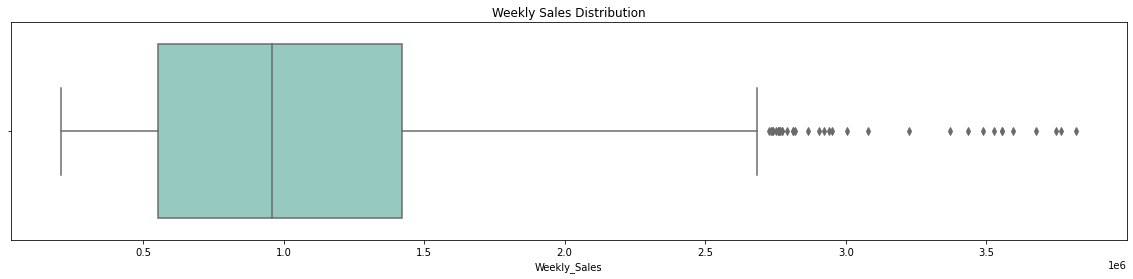

In [13]:
plt.figure(figsize=(20,4))
plt.title('Weekly Sales Distribution')
sns.boxplot(data=df, x='Weekly_Sales', palette='Set3')
plt.show()

In [14]:
df['Date'].nunique()

143

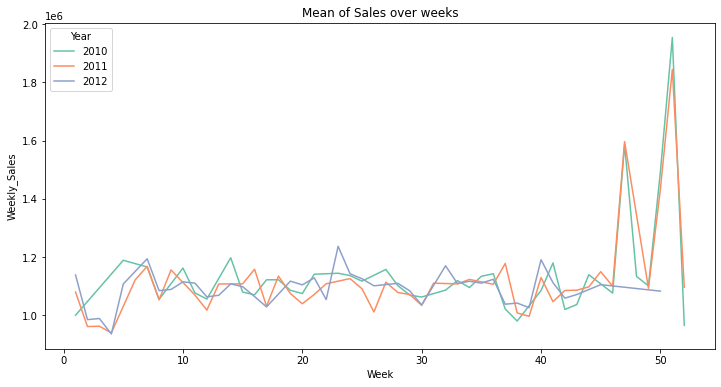

In [15]:
plt.figure(figsize=(12,6))
plt.title('Mean of Sales over weeks')
# Mean of sales grouped by weeks
line1 = sns.lineplot(data=train, x='Week', y='Weekly_Sales', hue='Year', estimator='mean', ci=None, palette='Set2')
plt.show()

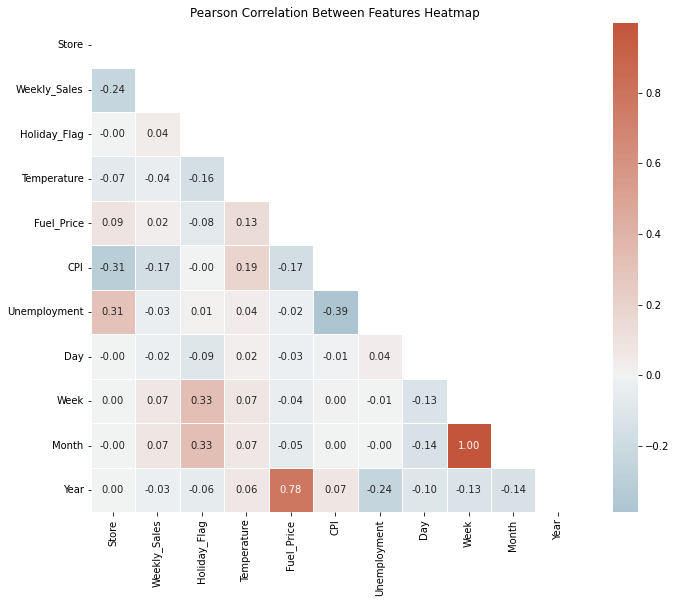

In [16]:
train_corr = train.corr(method='pearson')
mask = np.triu(np.ones_like(train_corr, dtype=bool))

plt.subplots(figsize=(12, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.title('Pearson Correlation Between Features Heatmap')
sns.heatmap(train_corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True, fmt='.2f')
plt.show()

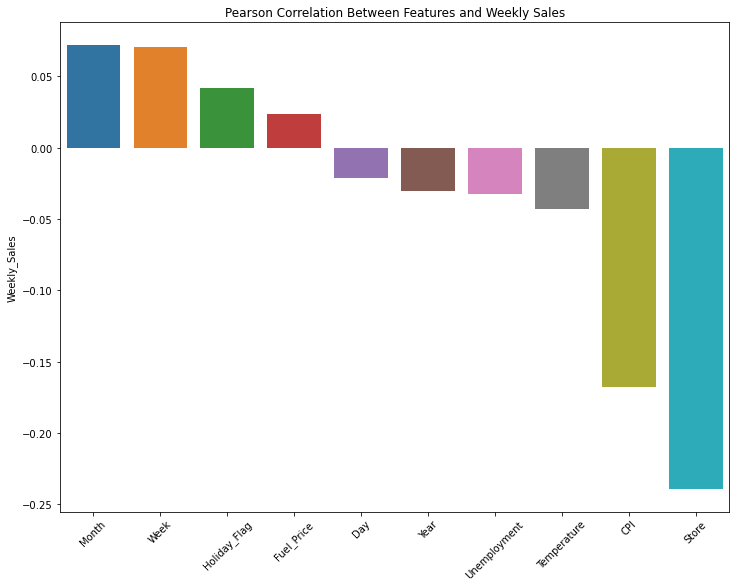

In [17]:
plt.subplots(figsize=(12, 9))
plt.title('Pearson Correlation Between Features and Weekly Sales')
weekly_corr = pd.DataFrame(data=train_corr.iloc[1,:], index=train_corr.iloc[1,:].index ).sort_values('Weekly_Sales', ascending=False)
sns.barplot(data=weekly_corr.iloc[1:], x=weekly_corr.iloc[1:].index, y='Weekly_Sales')
plt.xticks(rotation=45)
plt.show()

In [18]:
def make_mi_scores(X, y):
    X = X.copy()

    for colname in X.select_dtypes(['object', 'category', 'datetime64[ns]']):
        if X[colname].dtype == 'datetime64[ns]':
            X[colname], _ = X[colname].dt.strftime('%Y-%m-%d').factorize()
        else:
            X[colname], _ = X[colname].factorize()

    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    
    mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)

    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)

    sns.barplot(y=width, x=scores, orient='h')
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

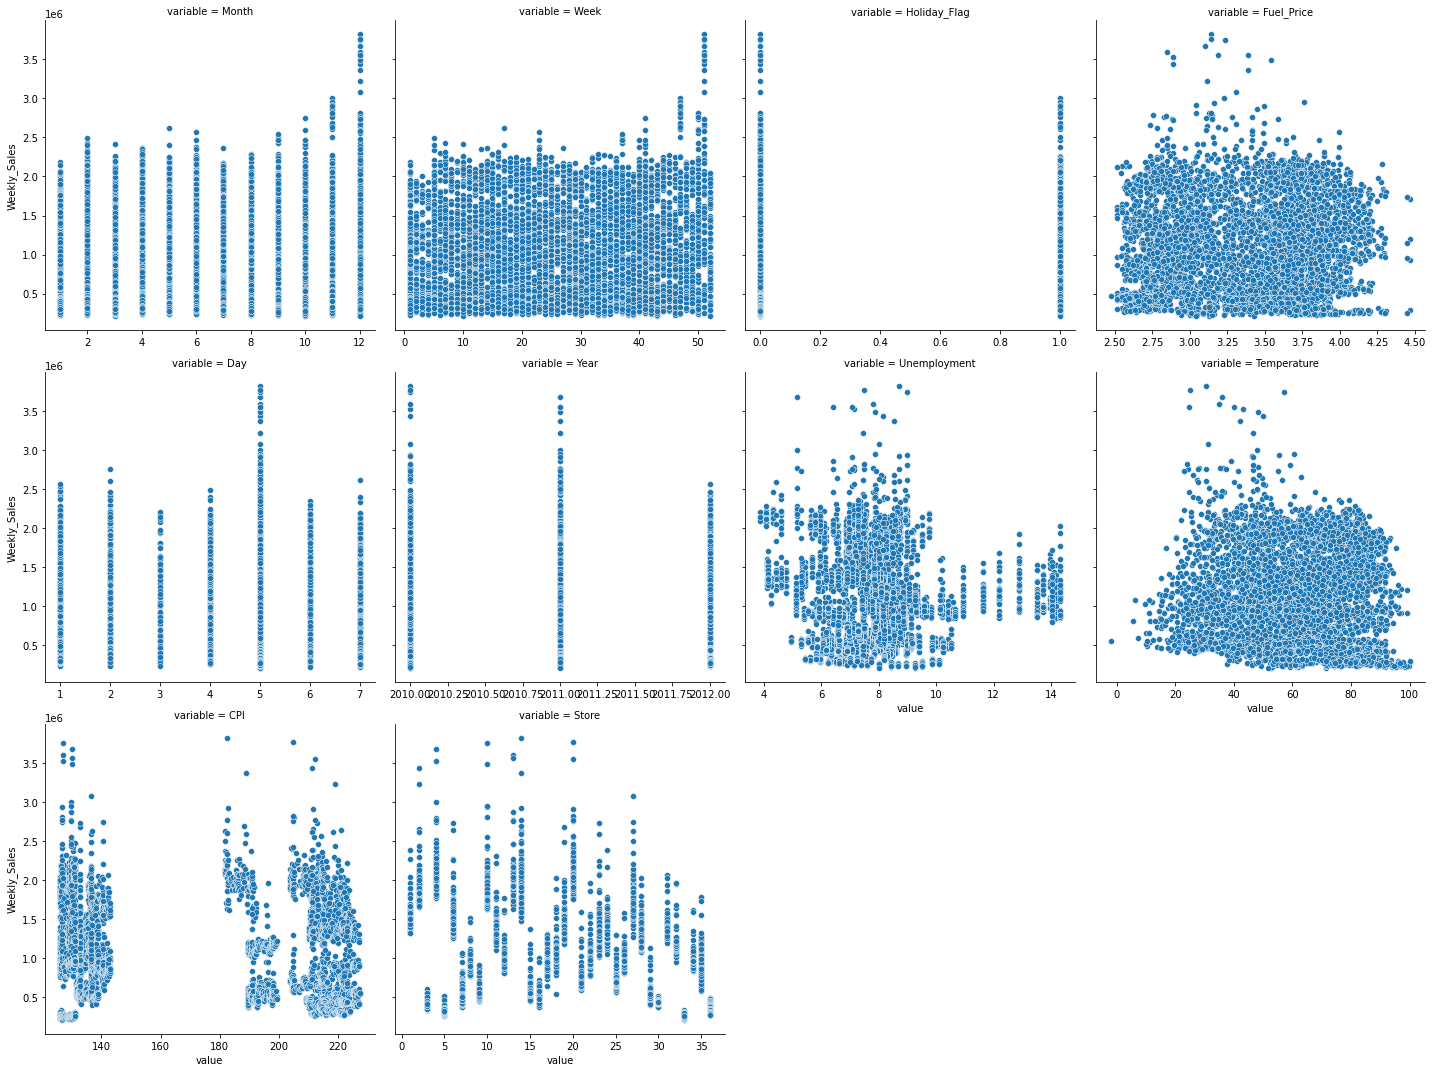

In [19]:
mi_features = weekly_corr[1:].index
sns.relplot(
    x="value", y="Weekly_Sales", col="variable",
    data=train.melt(id_vars="Weekly_Sales", value_vars=mi_features),
    col_wrap=4,
    facet_kws=dict(sharex=False),
);

Store          1.68
Unemployment   0.73
CPI            0.60
Temperature    0.09
Fuel_Price     0.07
Month          0.04
Year           0.01
Week           0.01
Day            0.00
Holiday_Flag   0.00
Date           0.00
Name: MI Scores, dtype: float64


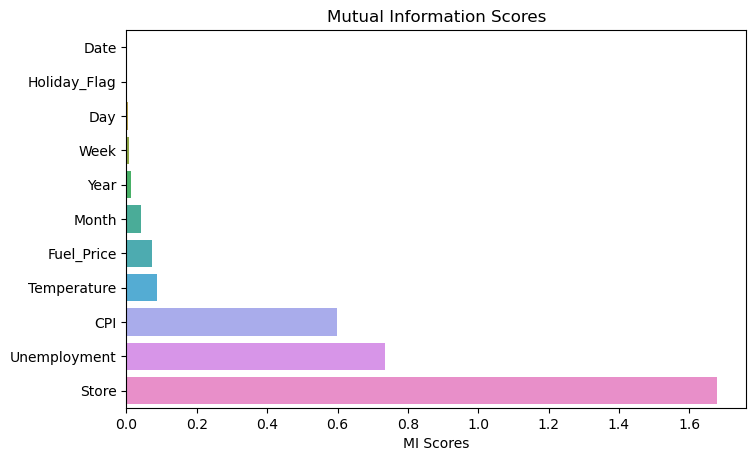

In [20]:
from sklearn.feature_selection import mutual_info_regression

mi_X = train.drop('Weekly_Sales', axis=1).copy()
mi_y = train['Weekly_Sales'].copy()

mi_scores = make_mi_scores(mi_X, mi_y)

print(mi_scores)

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

<AxesSubplot:title={'center':'CPI Distribution'}, ylabel='CPI'>

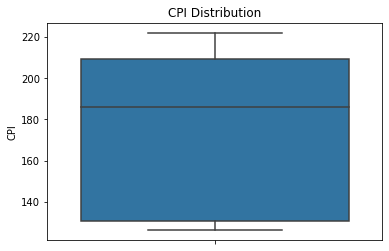

In [21]:
plt.title('CPI Distribution')
sns.boxplot(y=test['CPI'])

<AxesSubplot:title={'center':'Unemployment Distribution'}, ylabel='Unemployment'>

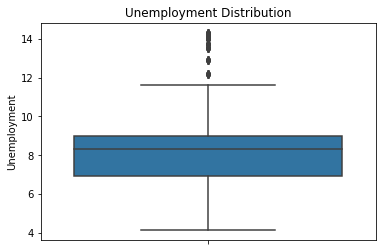

In [22]:
plt.title('Unemployment Distribution')
sns.boxplot(y=test['Unemployment'])

C:\Users\godbo\anaconda3\envs\data_science\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Date', ylabel='Unemployment'>

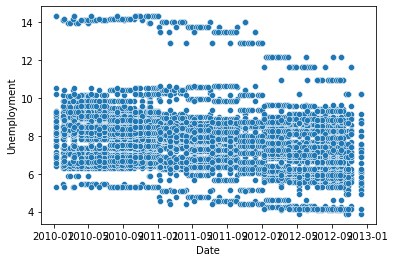

In [23]:
sns.scatterplot(train['Date'], train['Unemployment'])

In [24]:
df_store1 = df[df['Store']==1]

In [25]:
df_store1.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31        2.57   
1      1 2010-12-02    1641957.44             1        38.51        2.55   
2      1 2010-02-19    1611968.17             0        39.93        2.51   
3      1 2010-02-26    1409727.59             0        46.63        2.56   
4      1 2010-05-03    1554806.68             0        46.50        2.62   

     CPI  Unemployment  
0 211.10          8.11  
1 211.24          8.11  
2 211.29          8.11  
3 211.32          8.11  
4 211.35          8.11

(array([14610., 14730., 14853., 14975., 15095., 15218., 15340., 15461.,
        15584., 15706.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

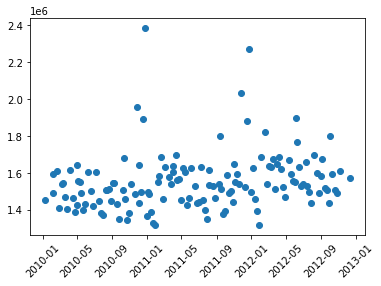

In [26]:
plt.scatter(df_store1['Date'], df_store1['Weekly_Sales'])
plt.xticks(rotation=45)

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

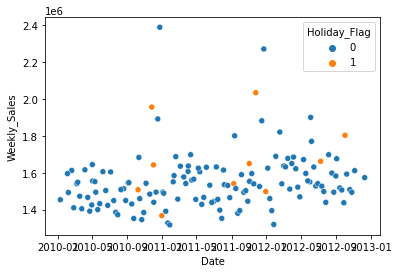

In [27]:
sns.scatterplot(data=df_store1, x='Date', y='Weekly_Sales', hue='Holiday_Flag')

In [28]:
from sklearn.model_selection import train_test_split as tts

In [29]:
import numpy as np

dates = list(set(df['Date']))
df_dates = pd.DataFrame()
avg_sales=[]
for i in dates:
    df_datex = df[df['Date']==i]
    mean = df_datex['Weekly_Sales'].mean()
    avg_sales.append(mean)
    #print(df_datex.head())
avg_sales = np.array(avg_sales)

In [30]:
df_store1

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0        1 2010-05-02    1643690.90             0        42.31        2.57   
1        1 2010-12-02    1641957.44             1        38.51        2.55   
2        1 2010-02-19    1611968.17             0        39.93        2.51   
3        1 2010-02-26    1409727.59             0        46.63        2.56   
4        1 2010-05-03    1554806.68             0        46.50        2.62   
..     ...        ...           ...           ...          ...         ...   
138      1 2012-09-28    1437059.26             0        76.08        3.67   
139      1 2012-05-10    1670785.97             0        68.55        3.62   
140      1 2012-12-10    1573072.81             0        62.99        3.60   
141      1 2012-10-19    1508068.77             0        67.97        3.59   
142      1 2012-10-26    1493659.74             0        69.16        3.51   

       CPI  Unemployment  
0   211.10          8.11  
1   211.24          8.11  
2   211.29          8.11  
3   211.32          8.11  
4   211.35          8.11  
..     ...           ...  
138 222.98          6.91  
139 223.18          6.57  
140 223.38          6.57  
141 223.43          6.57  
142 223.44          6.57  

[143 rows x 8 columns]

In [31]:
dates = df['Date'].unique()

In [32]:
def create_df_for_store(df, number):
    df_store = df[df['Store']==number]
    df_new = pd.DataFrame()
    df_new['Dates'] = df_store['Date']
    df_new['Avg_Sales'] = df_store['Weekly_Sales']
    return df_new

In [33]:
def show_plots_for_store(df_new):
    plt.plot(sorted(df_new['Dates']), df_new['Avg_Sales'])
    plt.show()
    df_new = df_new.set_index('Dates')
    autocorrelation_plot(df_new)
    df_new.reset_index(inplace=True)

In [34]:
def preds_for_final_twelve_weeks(df_new):
    
    df_new['Dates'] = sorted(dates)
    df_new['Dates'] = pd.to_datetime(df_new['Dates'])
    df_new = df_new.set_index('Dates')
    df_new.index = df_new.index.to_period('W')

    X = df_new.values
    size = int(len(X) * 0.92)
    train, test = X[0:size], X[size:len(X)]
        
    df_train, df_test = df_new.iloc[0:size].copy(), df_new.iloc[size:].copy()
    sarima = SARIMAX(df_train.values, order=(1,1,0), seasonal_order=(1,0,0,12))
    predictions = sarima.fit().predict()
    plt.figure(figsize=(16,4))
    plt.plot(df_train.values, label="Actual")
    plt.plot(predictions, label="Predicted")
    plt.ylabel('Sales', fontsize=16)
    plt.legend()
    
    df_train['Predictions'] = predictions
    
    sarima = SARIMAX(df_test.values, 
                    order=(1,1,0), 
                    seasonal_order=(1,0,0,12))
    predictions = sarima.fit().predict()
    plt.figure(figsize=(16,4))
    plt.plot(df_test.values, label="Actual")
    plt.plot(predictions, label="Predicted")
    plt.ylabel('Sales', fontsize=16)
    plt.legend()
    
    df_test['Predictions'] = predictions
    
    actual = list(df_test['Avg_Sales'])
    
    rmse = math.sqrt(mean_squared_error(test[1:], predictions[1:]))
    rmse_by_mean = rmse/df_test['Avg_Sales'].mean() 
    return actual, predictions, rmse, rmse_by_mean


STORE:  1 




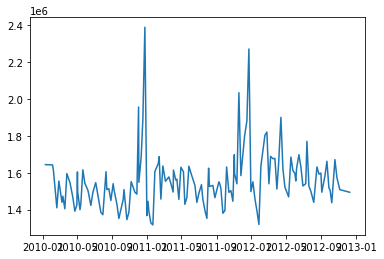

C:\Users\godbo\anaconda3\envs\data_science\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


PREDS: [      0.         1569573.22561116 1597789.76849869 1495610.3330535
 1580821.83536508 1660624.47799506 1519499.0176275  1506288.16824378
 1438049.85276425 1667432.74352453 1574547.06476744 1503923.65460852] 
RMSE: 103856.70099384381   RMSE/MEAN: 0.06688044119188784








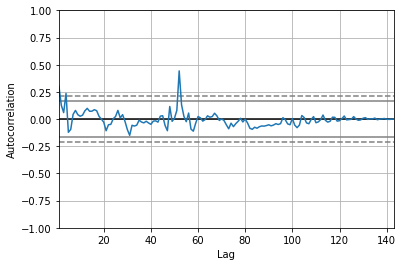

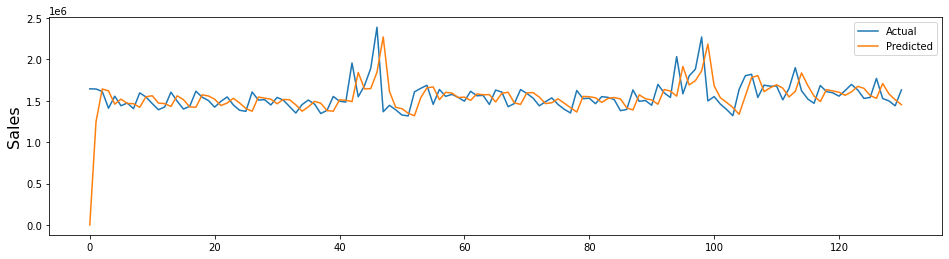

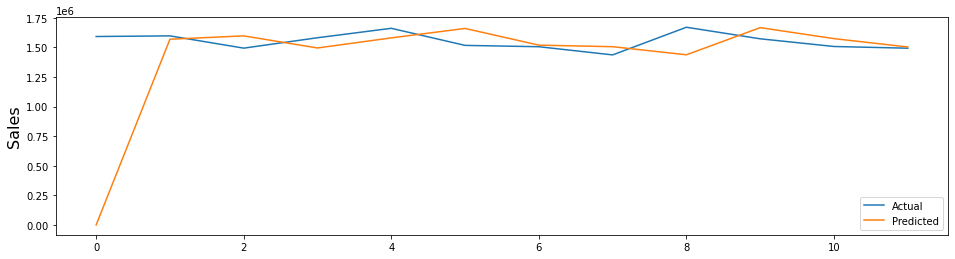

In [35]:
def show_prediction(number):
    print("STORE: ", number, "\n\n")
    df_store = create_df_for_store(df, number)
    show_plots_for_store(df_store)
    actual, preds, rmse, rmse_by_mean = preds_for_final_twelve_weeks(df_store)
    
    print("PREDS:", preds, "\nRMSE:", rmse, "  RMSE/MEAN:", rmse_by_mean)
    print('\n\n\n\n\n')
    
show_prediction(1)

C:\Users\godbo\anaconda3\envs\data_science\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\godbo\anaconda3\envs\data_science\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\godbo\anaconda3\envs\data_science\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\godbo\anaconda3\envs\data_science\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate star

C:\Users\godbo\anaconda3\envs\data_science\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\godbo\anaconda3\envs\data_science\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\godbo\anaconda3\envs\data_science\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\godbo\anaconda3\envs\data_science\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate star

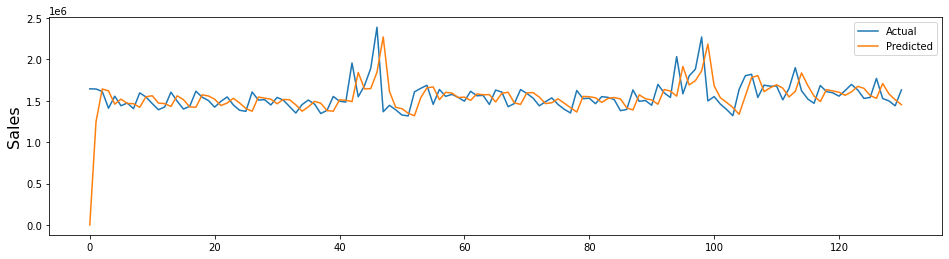

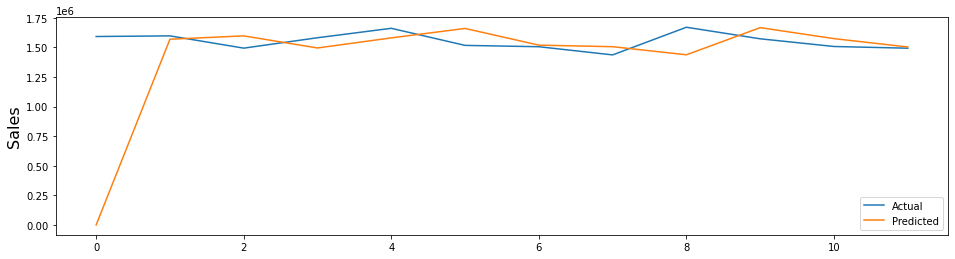

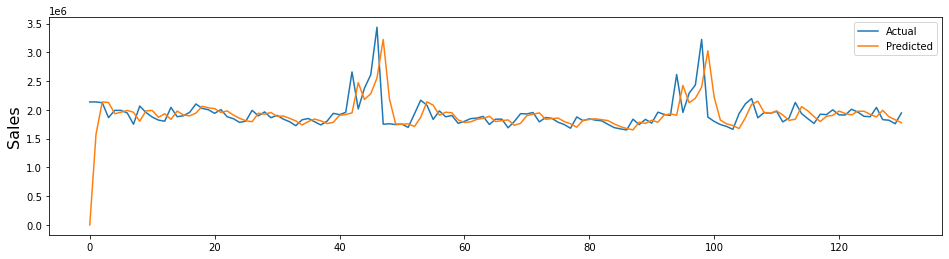

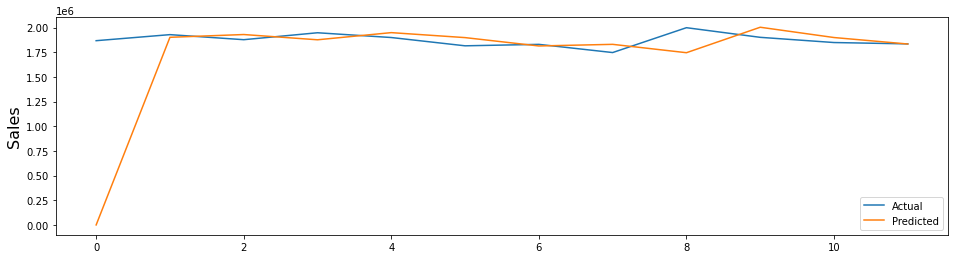

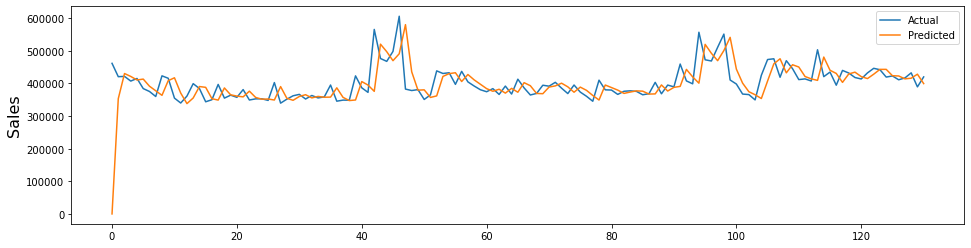

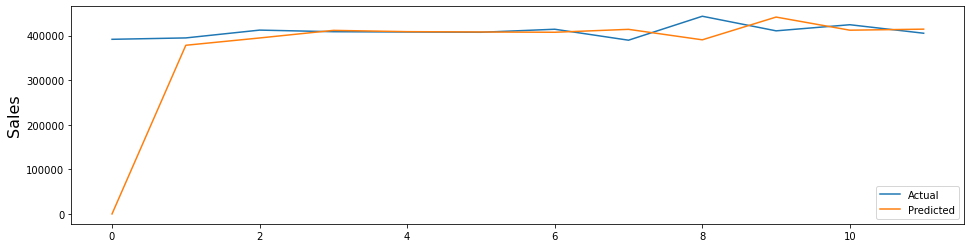

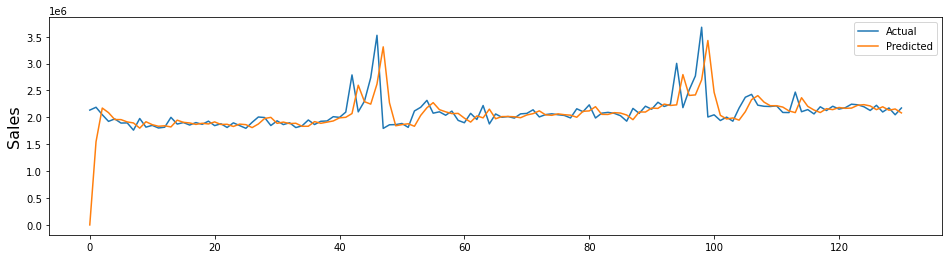

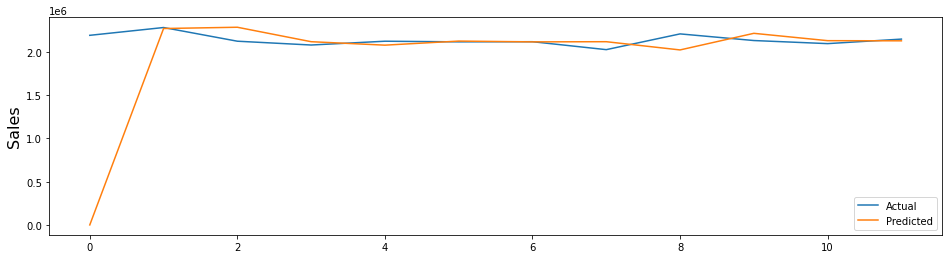

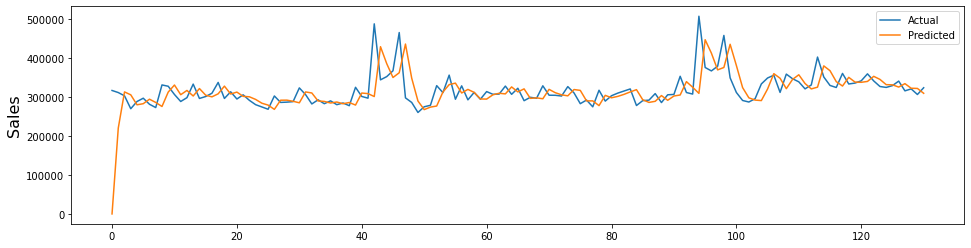

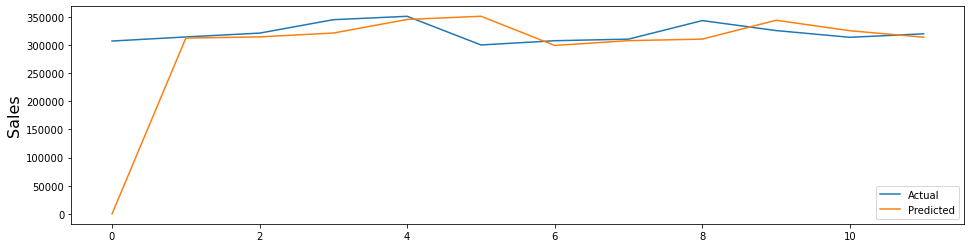

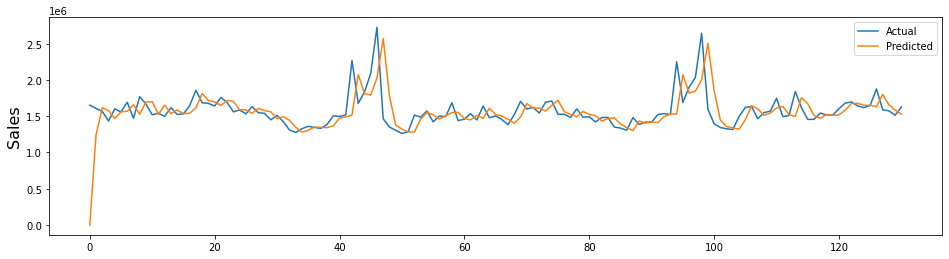

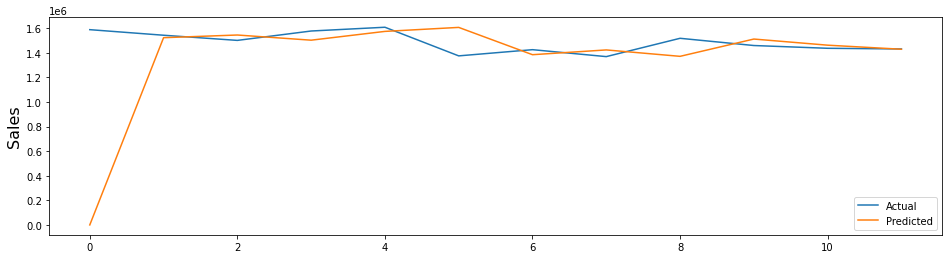

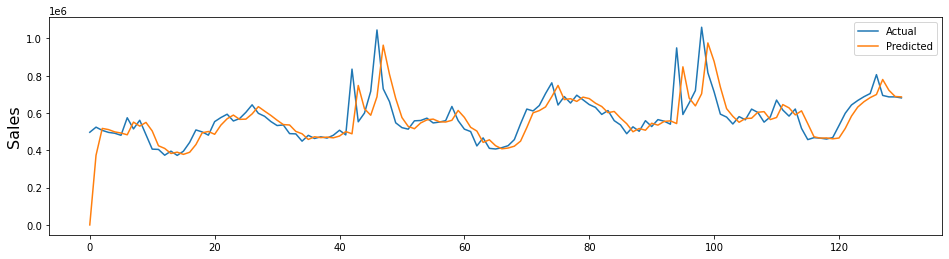

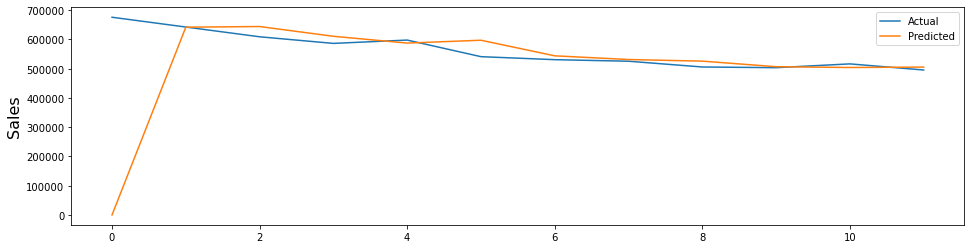

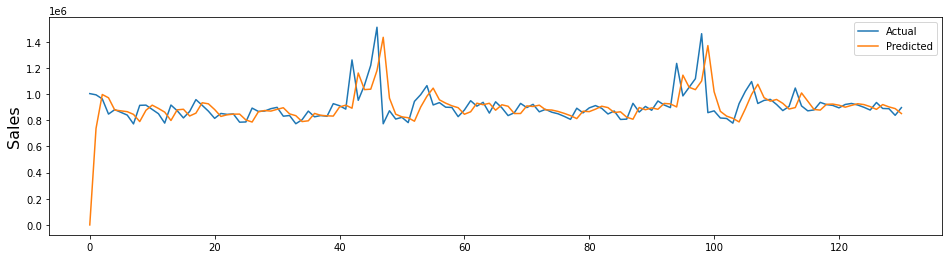

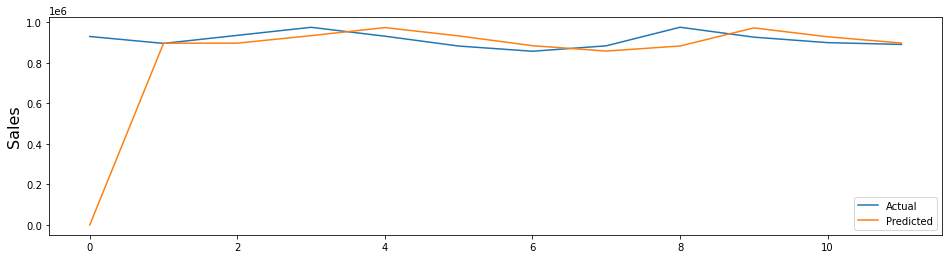

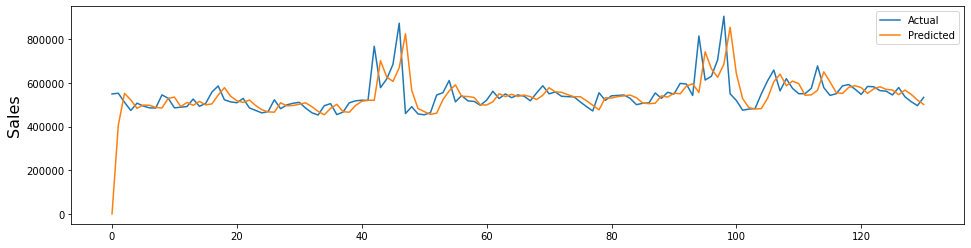

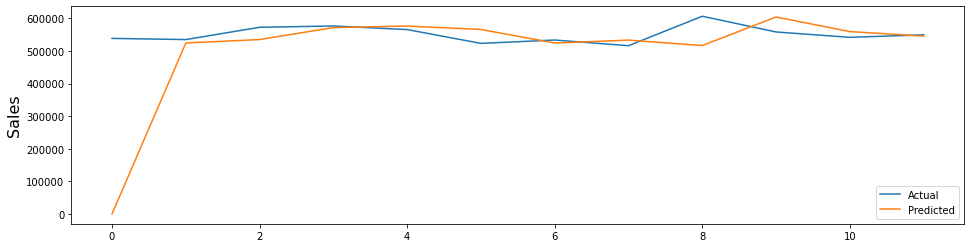

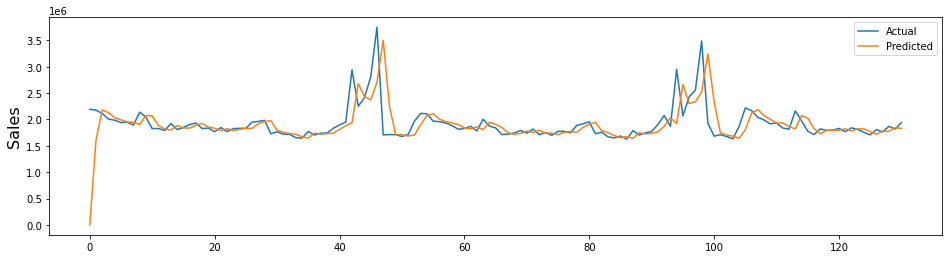

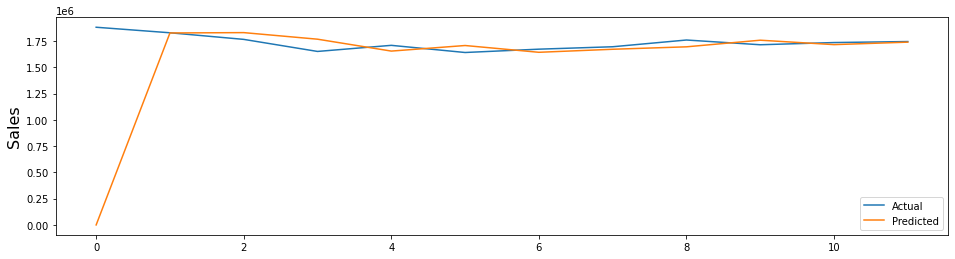

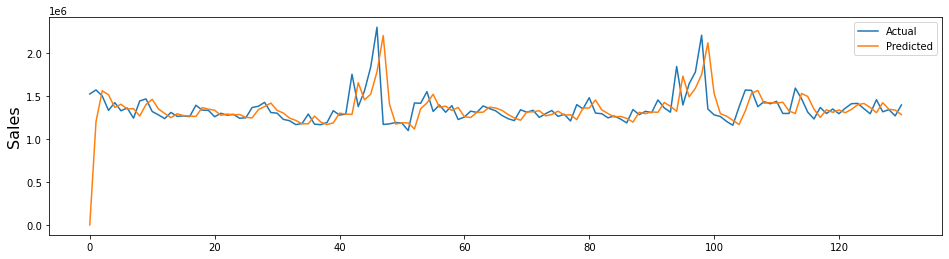

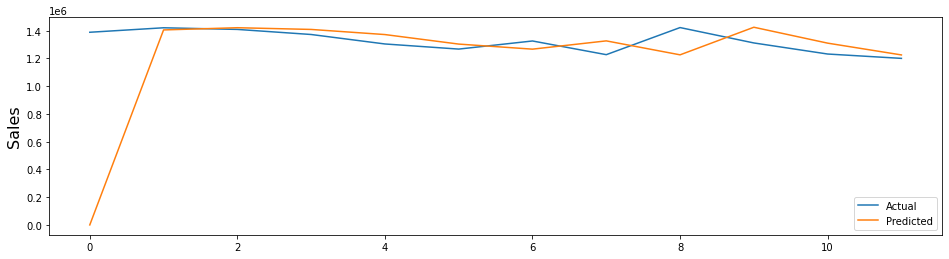

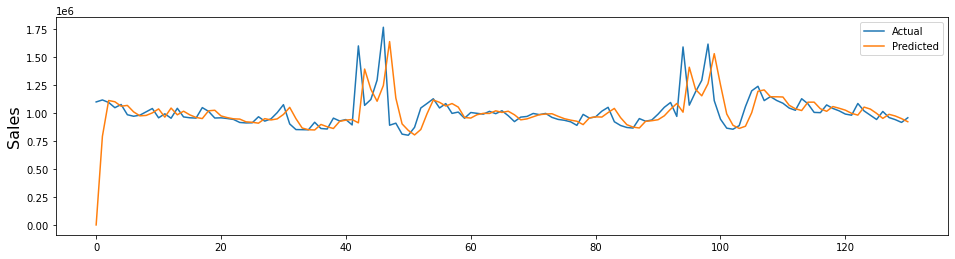

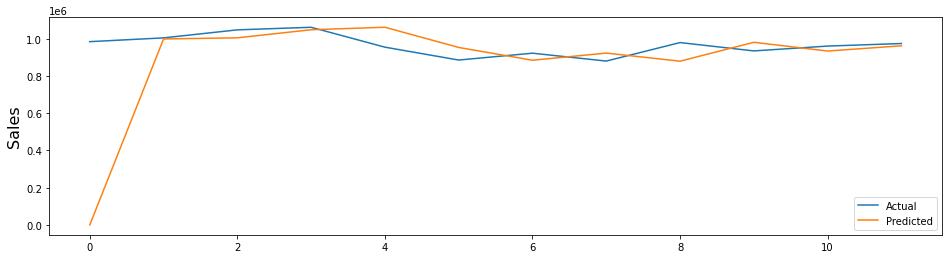

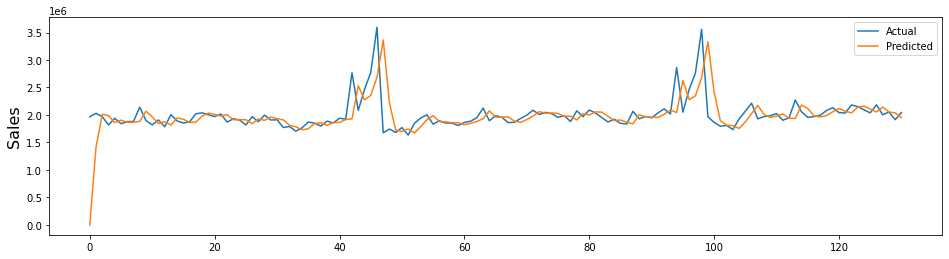

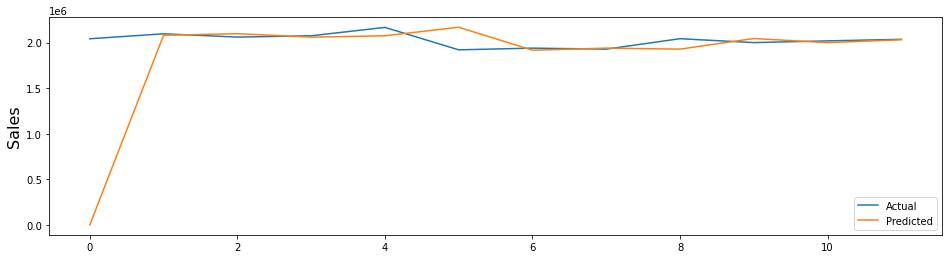

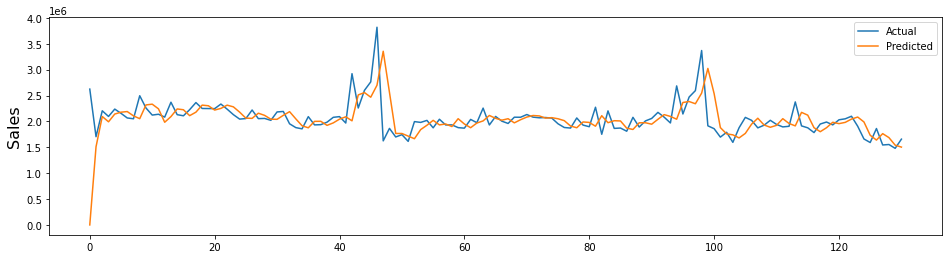

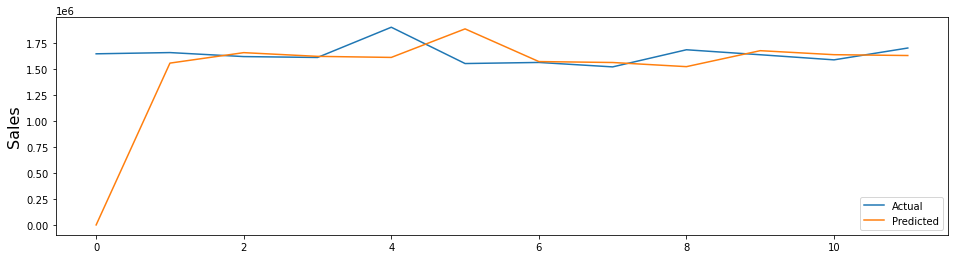

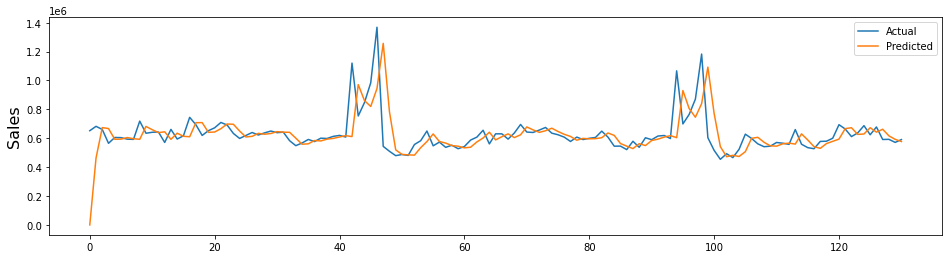

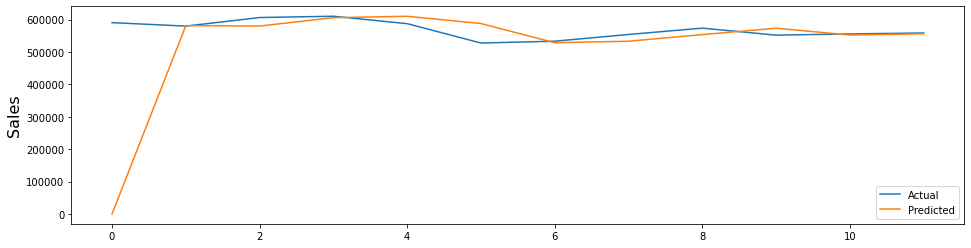

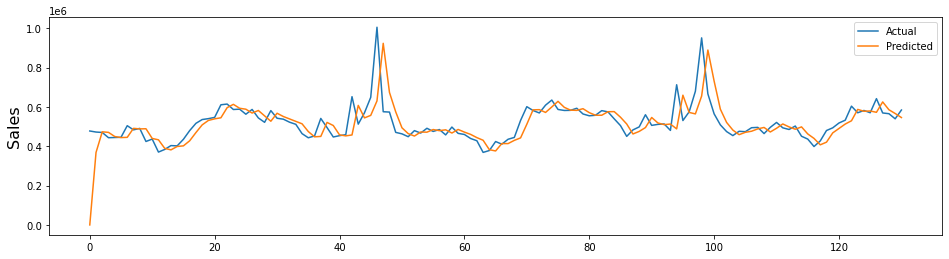

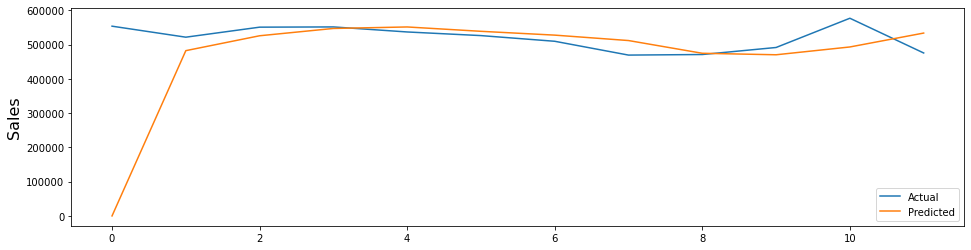

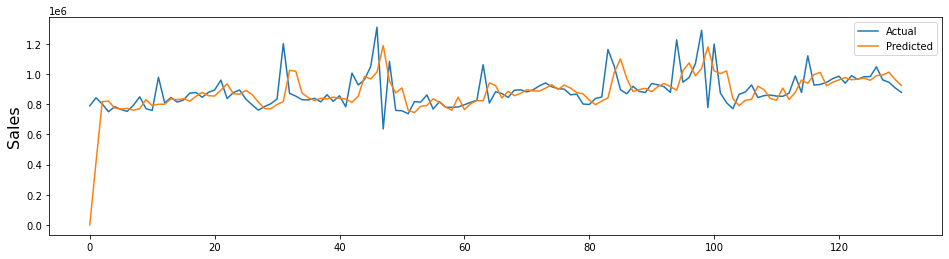

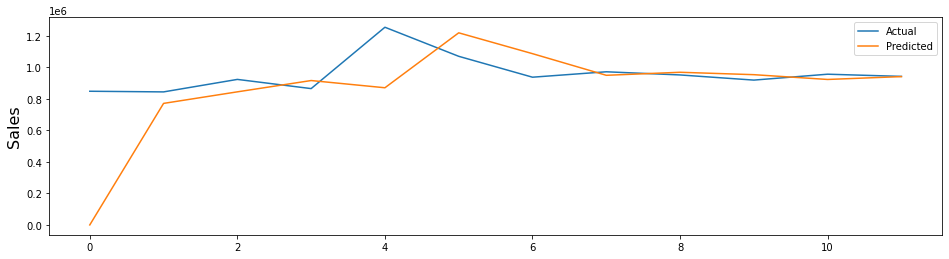

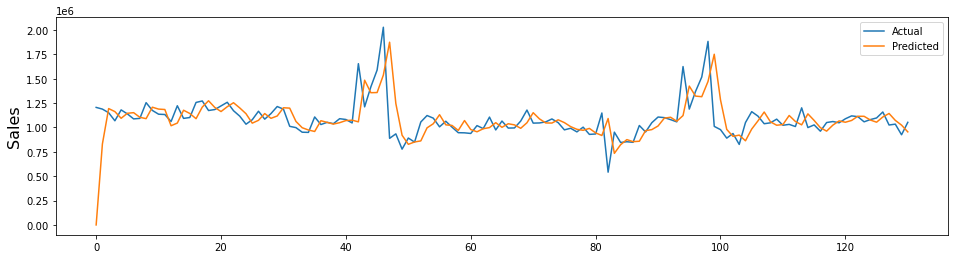

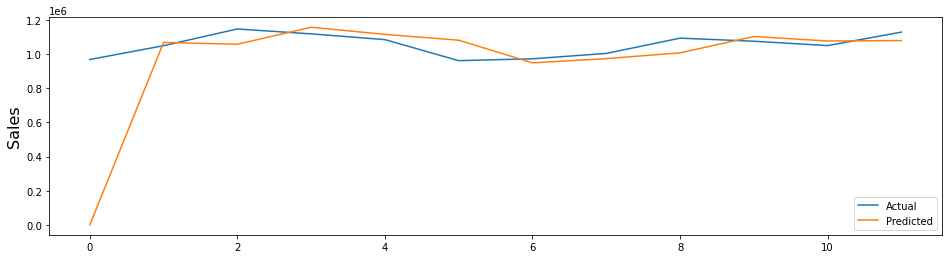

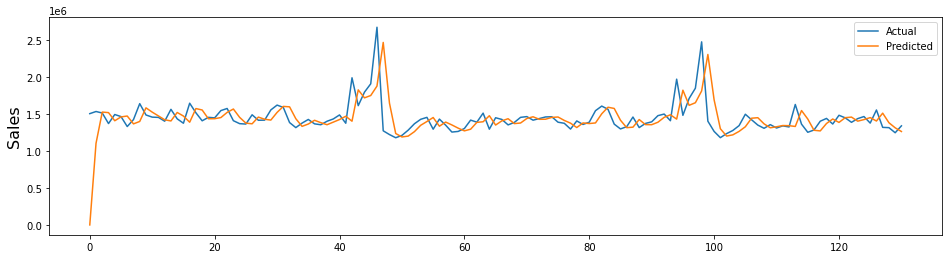

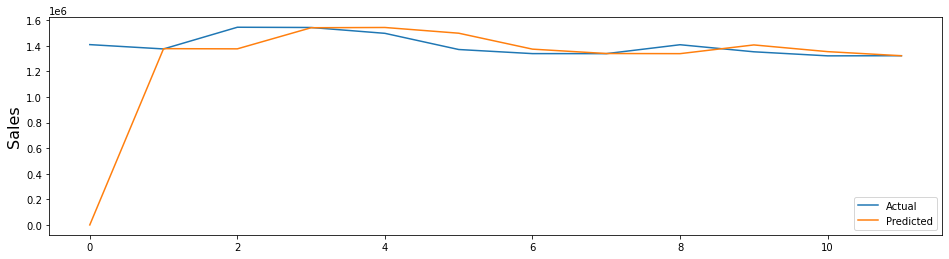

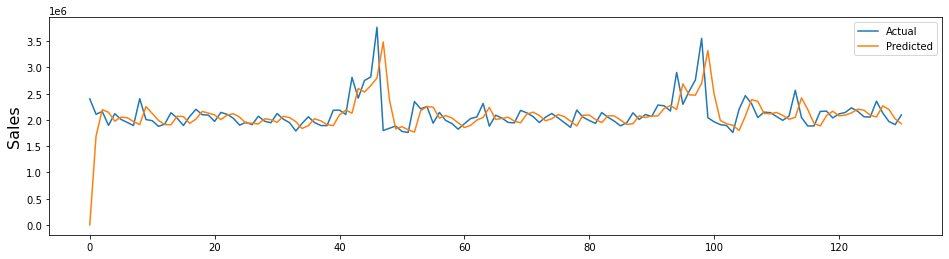

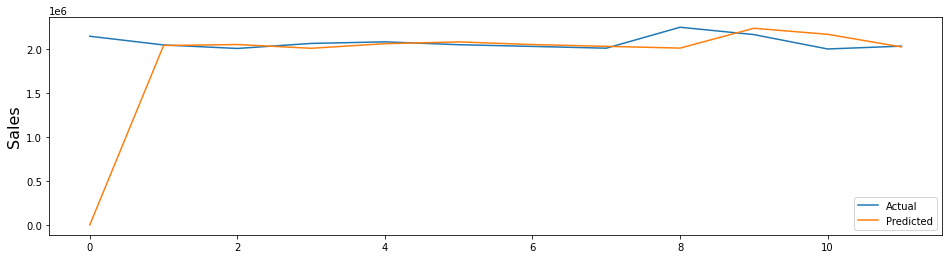

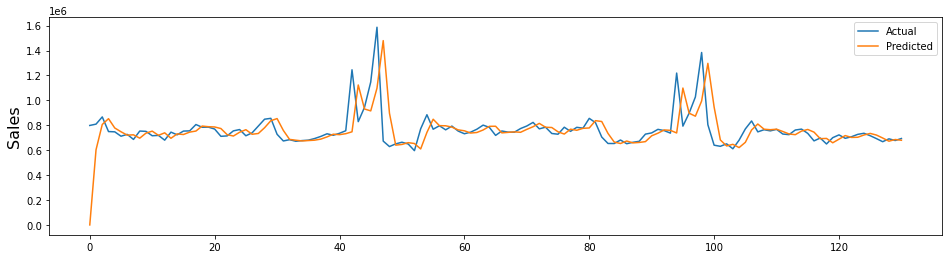

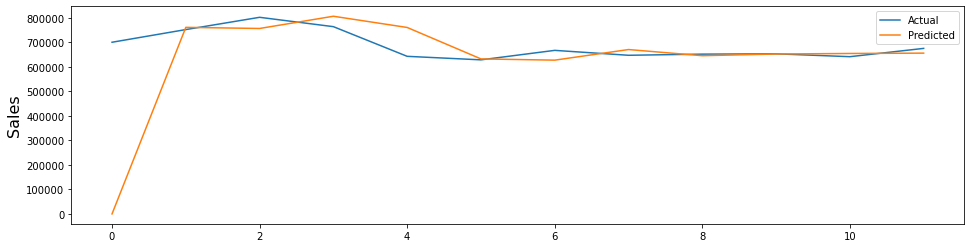

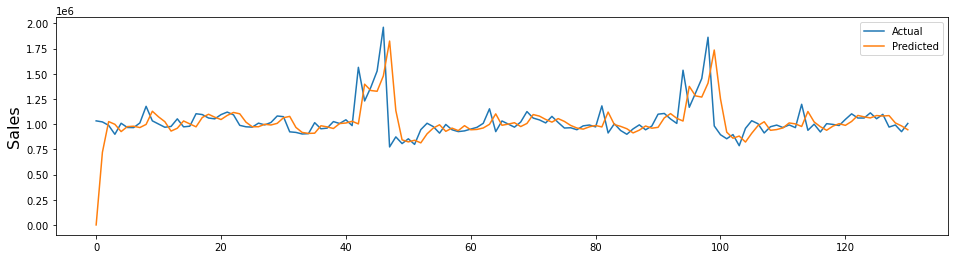

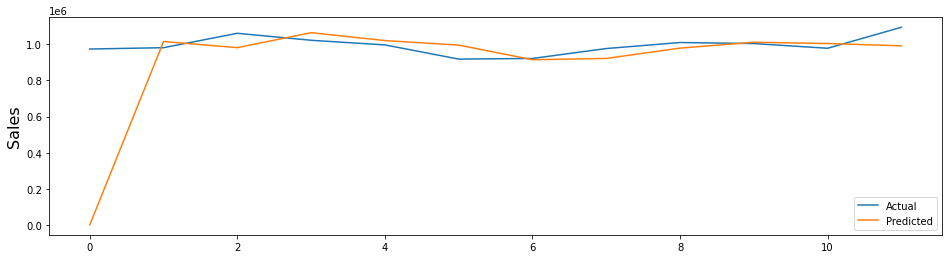

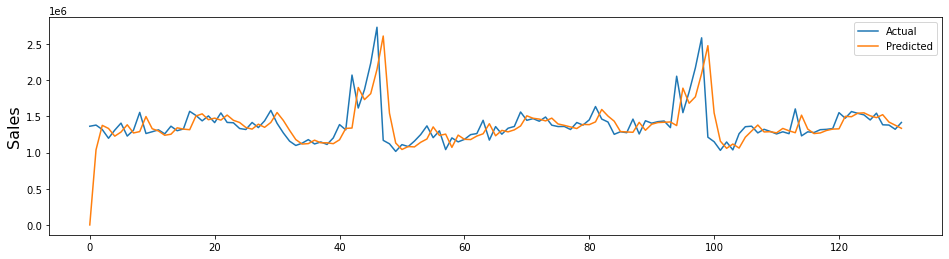

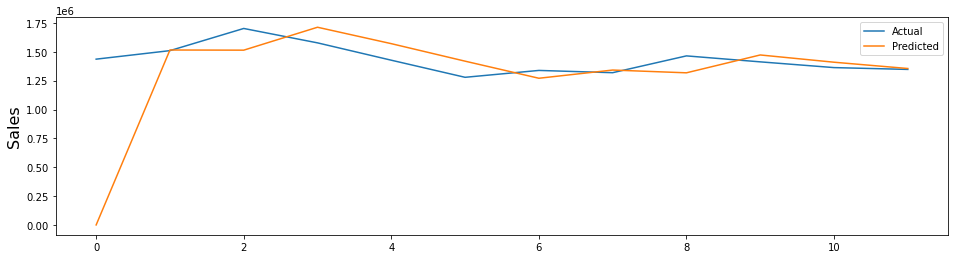

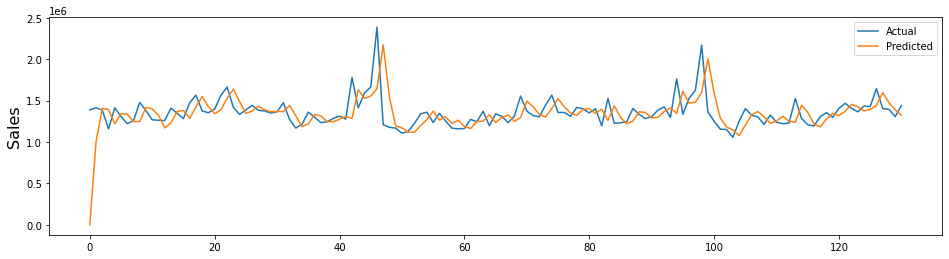

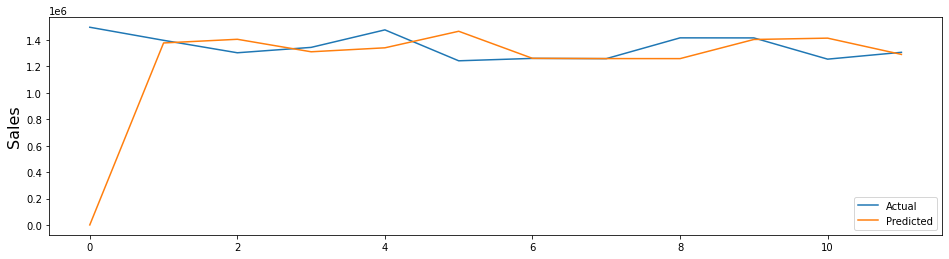

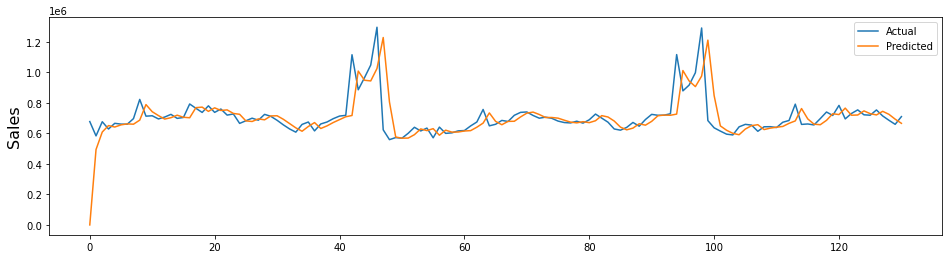

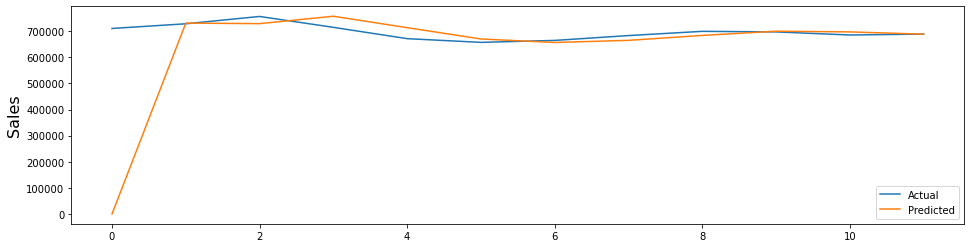

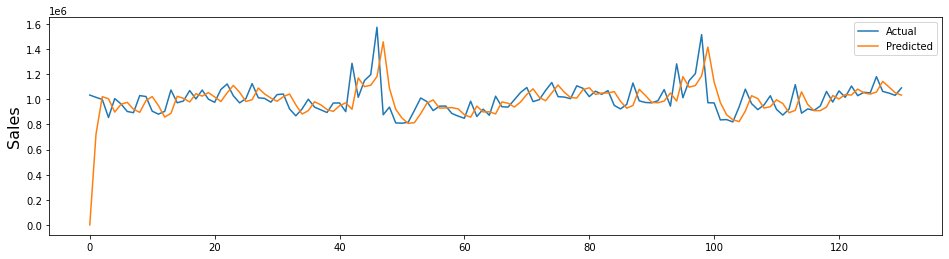

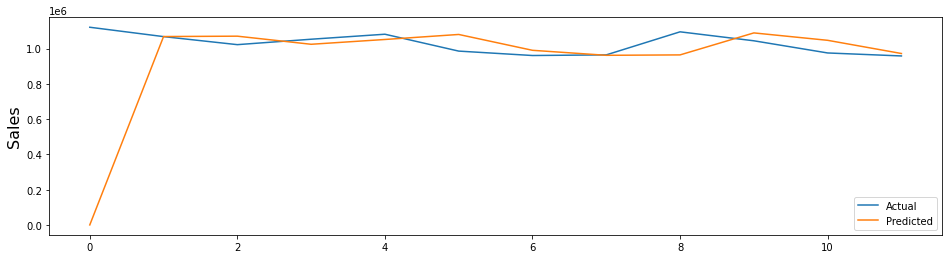

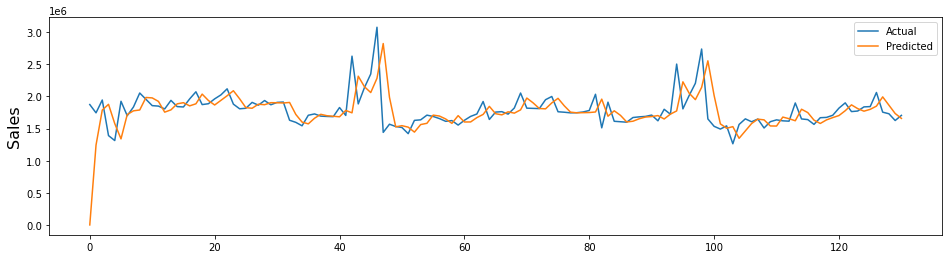

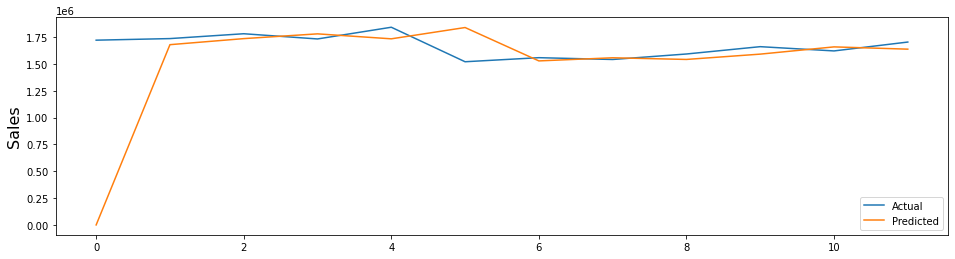

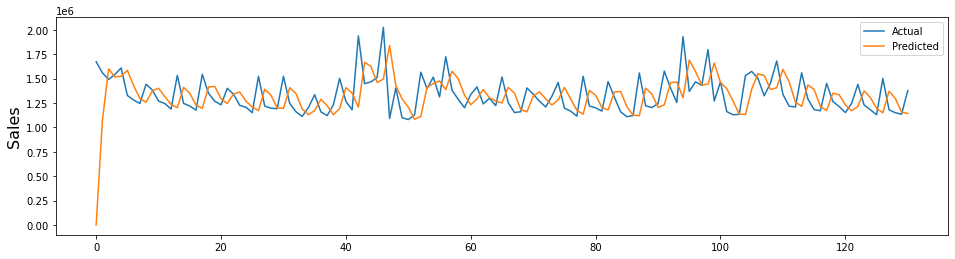

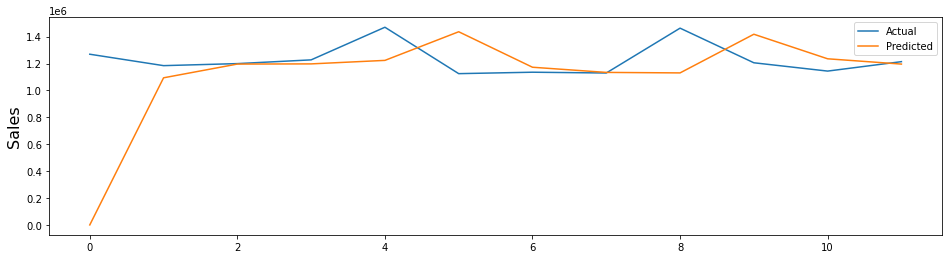

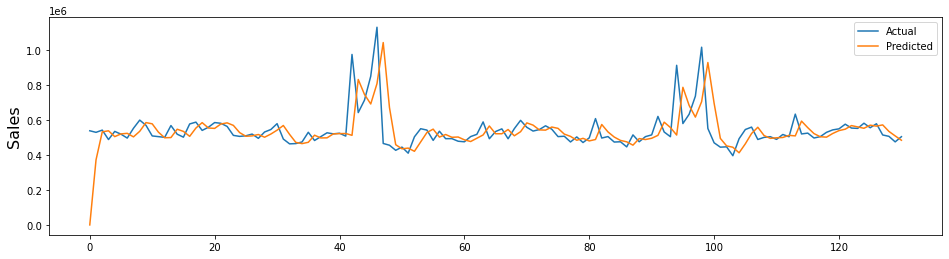

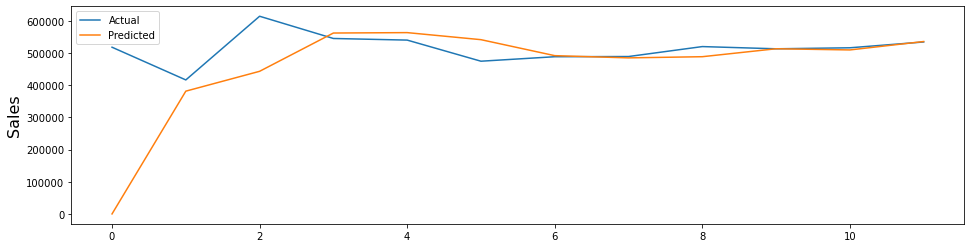

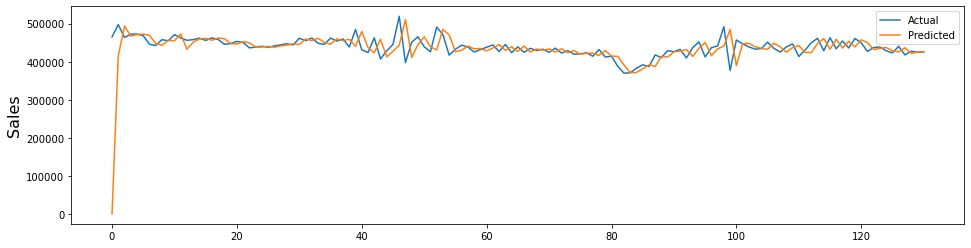

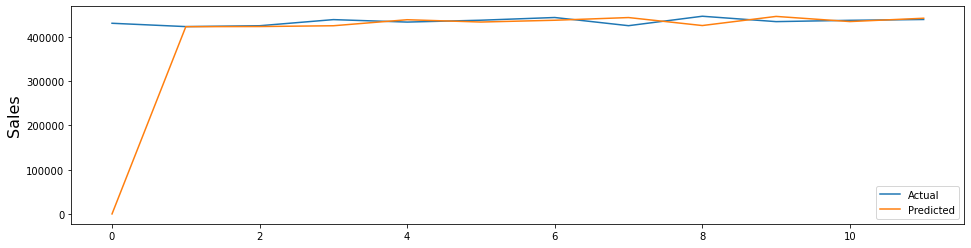

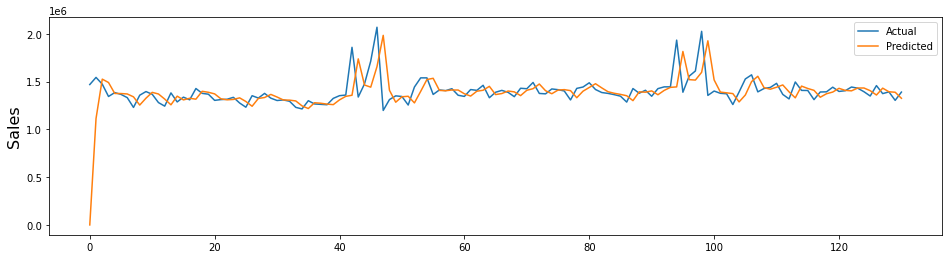

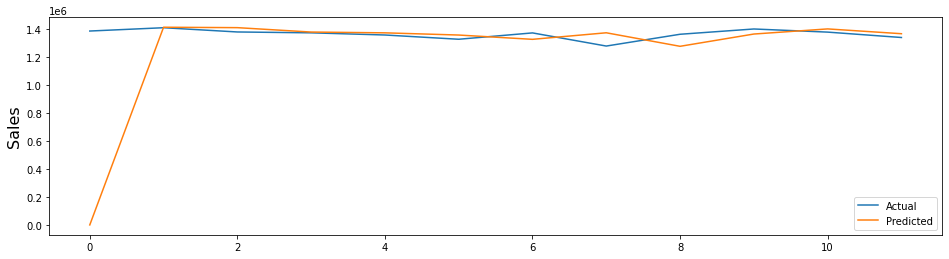

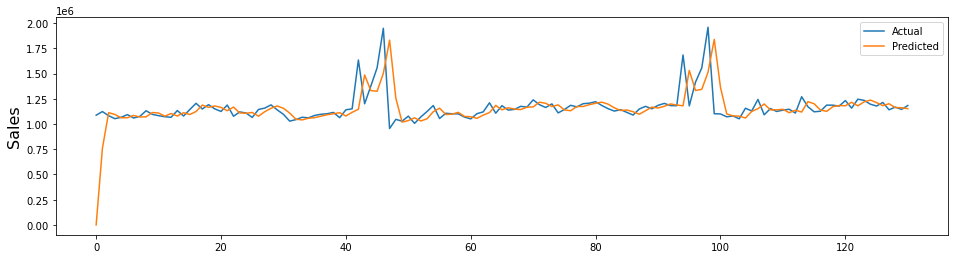

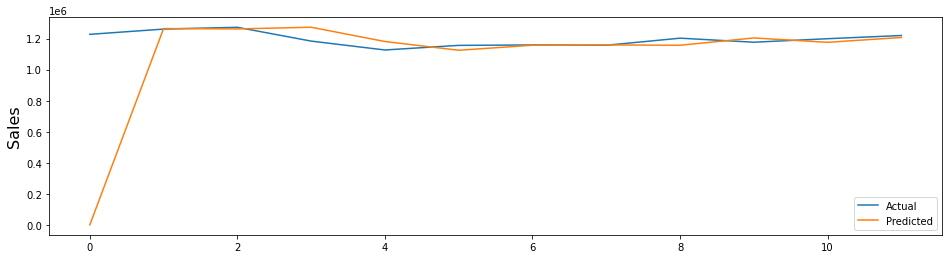

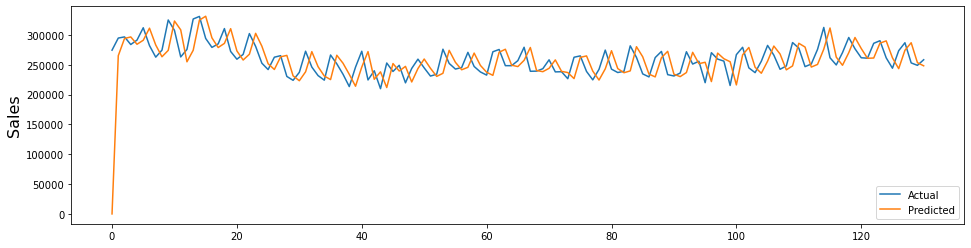

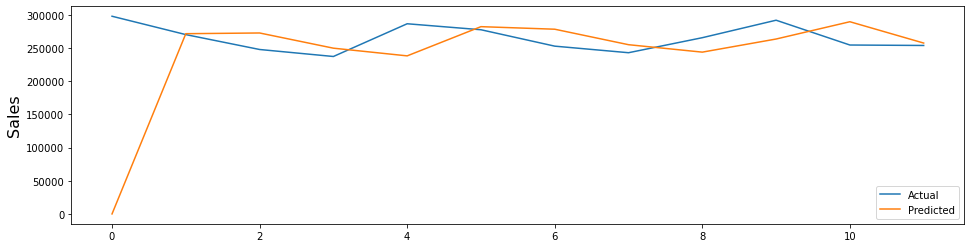

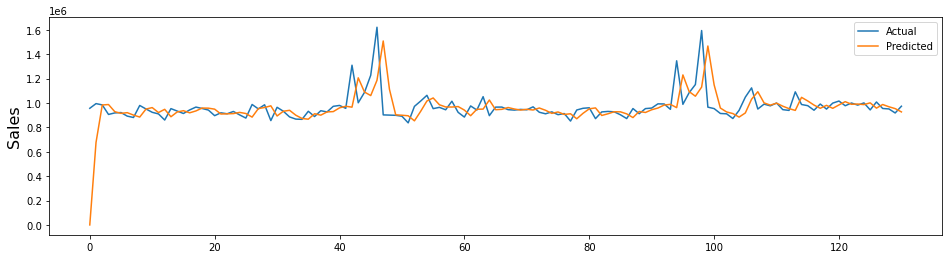

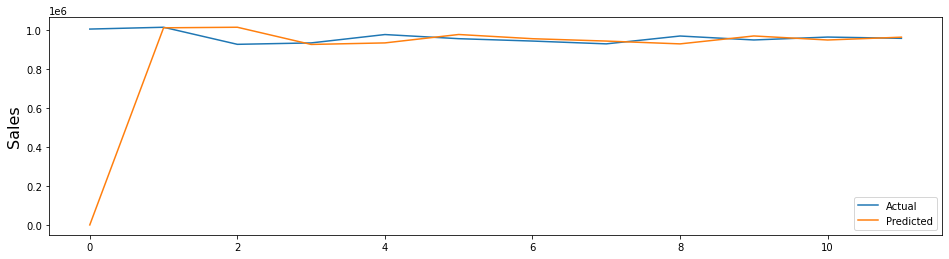

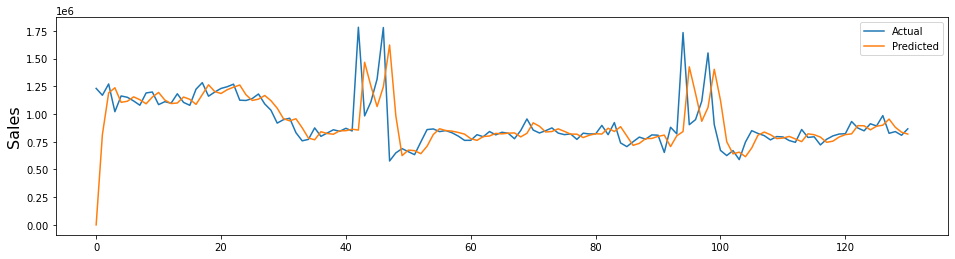

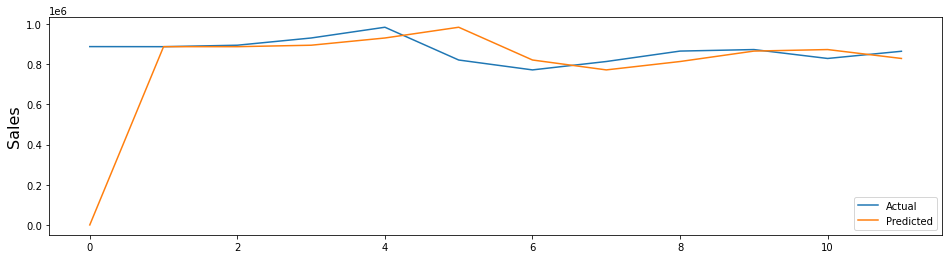

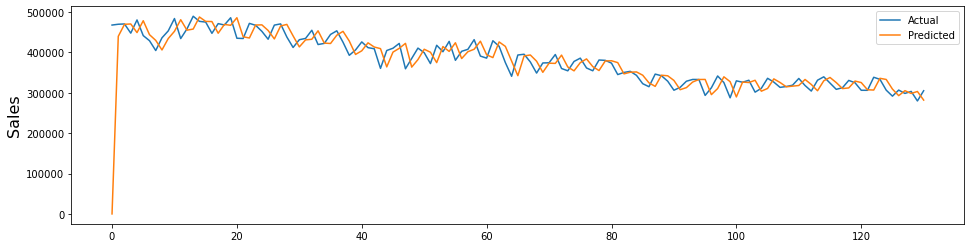

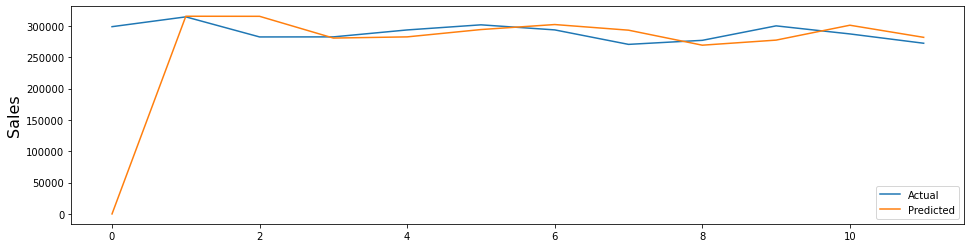

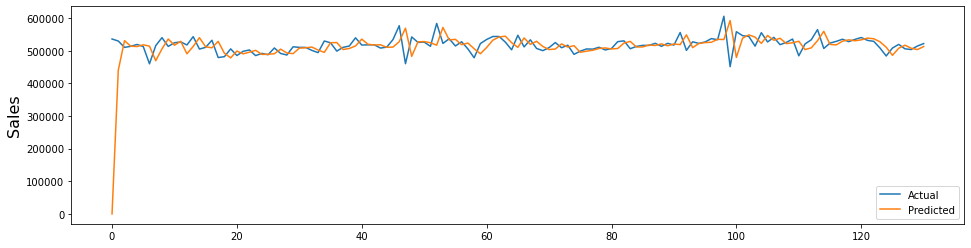

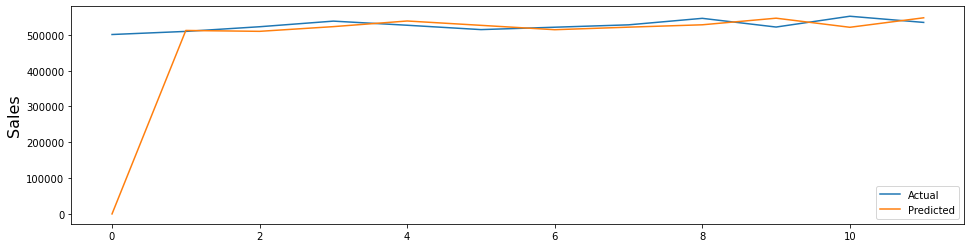

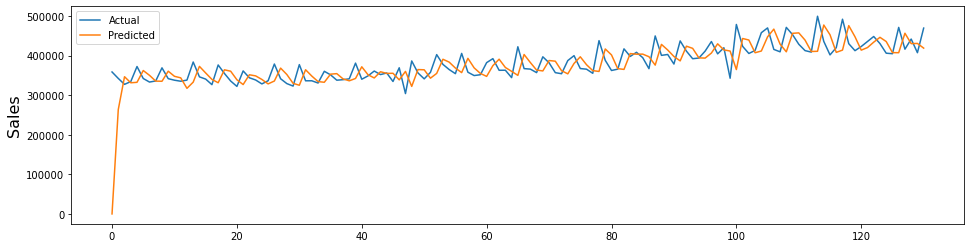

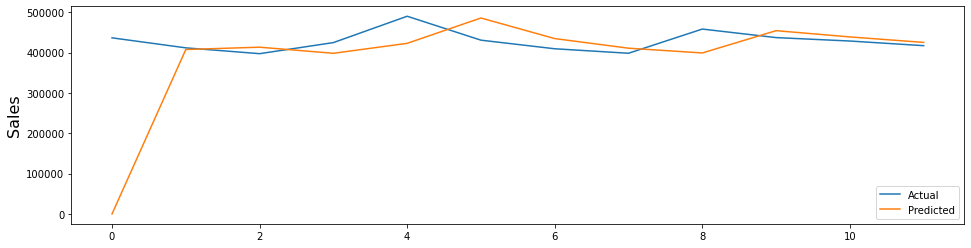

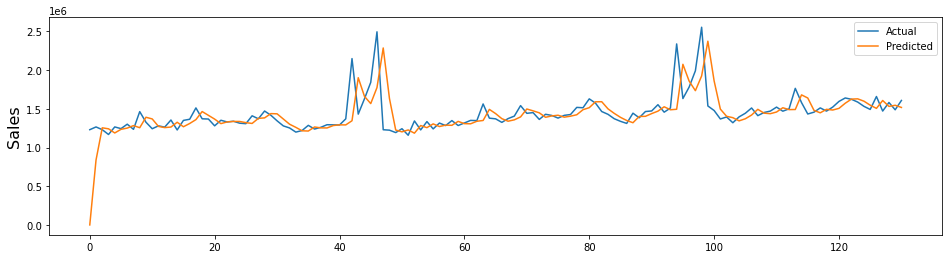

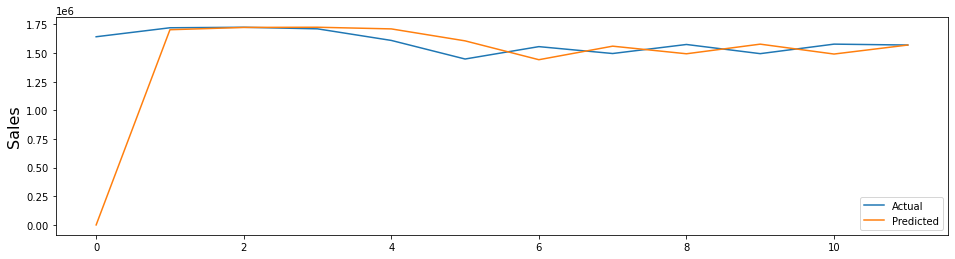

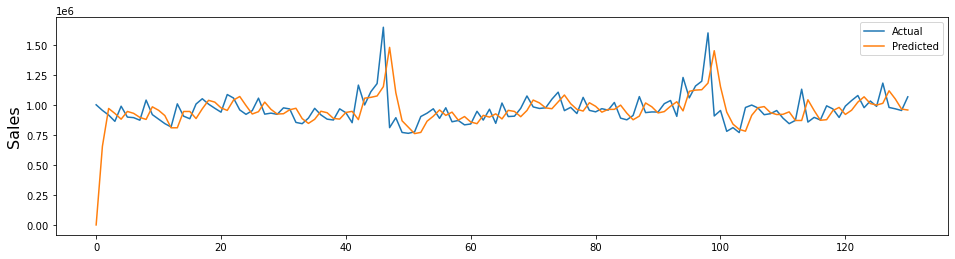

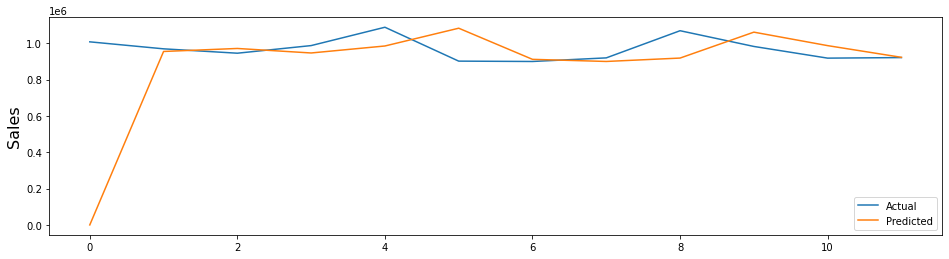

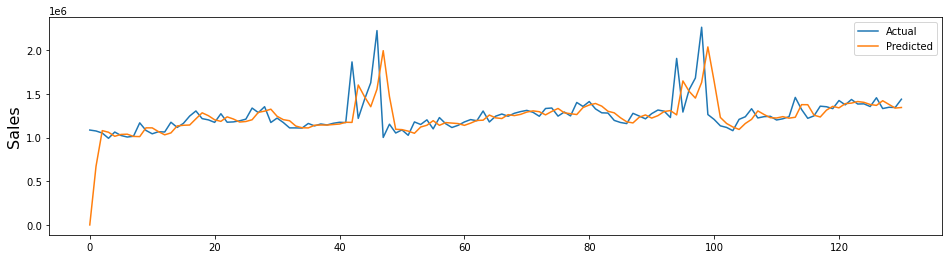

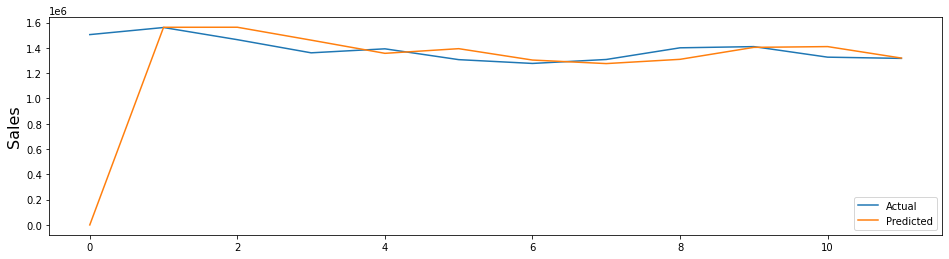

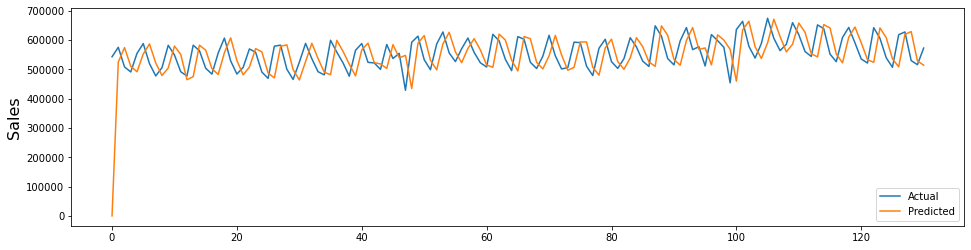

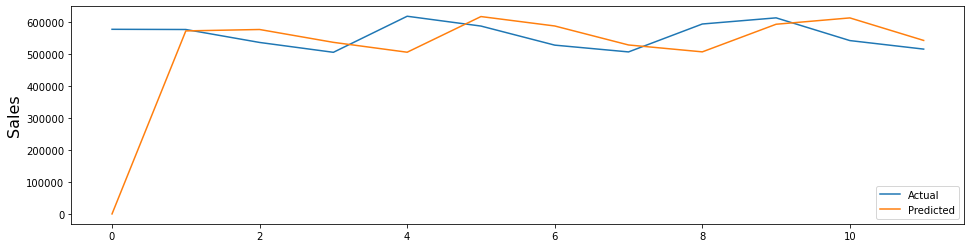

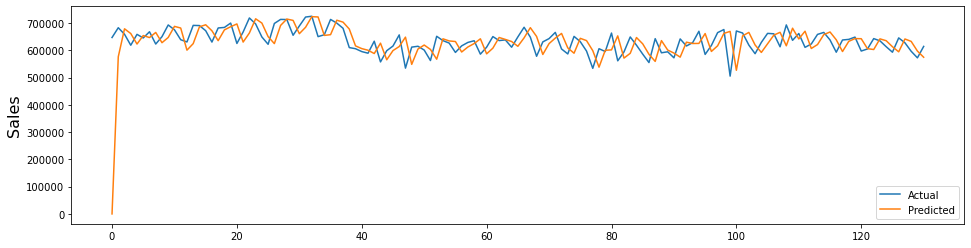

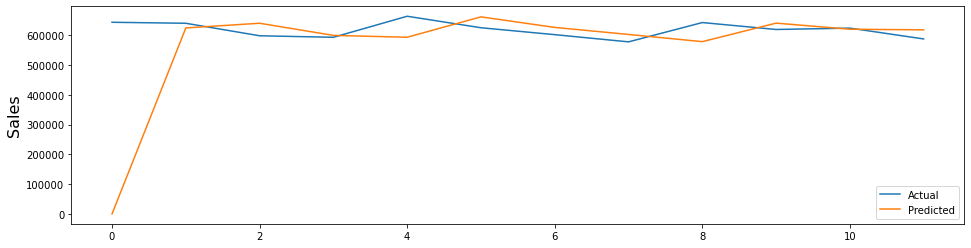

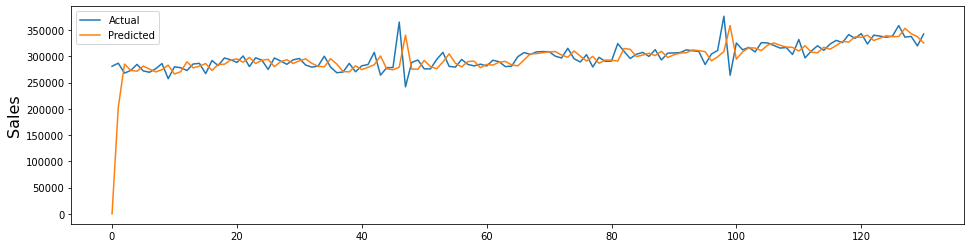

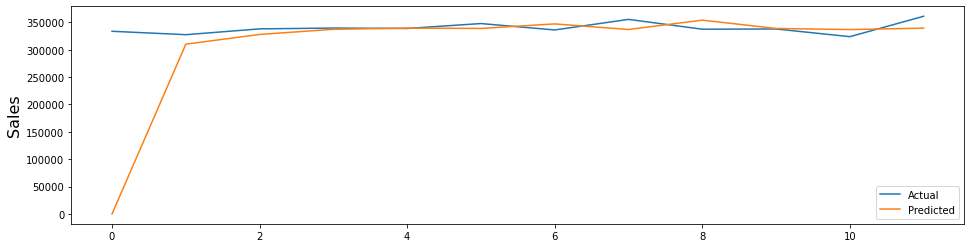

In [36]:
preds_per_store = {}
actuals = []
for i in range(1, 45):
    df_store = create_df_for_store(df, i)
    print("STORE", i)
    actual, preds, rmse, rmse_by_mean = preds_for_final_twelve_weeks(df_store)
    actuals.append(actual)
    preds_per_store[i] = preds
    print('\n\n\n')

In [37]:
len(actuals)

44

In [38]:
X = df_store1.values
size = int(len(X) * 0.92)
df_train, df_test = df_store1.iloc[0:size].copy(), df_store1.iloc[size:].copy()
dates = list(df_test['Date'])

In [40]:
df_final_predictions = pd.DataFrame(columns=['Store', 'Date', 'Actual', 'Prediction'])
for i in range(1, 45):
    for j in range(len(dates)):
        
        row = pd.DataFrame({'Store': [i], 'Date': [dates[j]], 'Actual': [actuals[i-1][j]], 'Prediction': [preds_per_store[i][j]]})
        df_final_predictions = pd.concat([df_final_predictions, row])

In [41]:
df_final_predictions.head()

Store       Date     Actual  Prediction
0     1 2012-10-08 1592409.97        0.00
0     1 2012-08-17 1597868.05  1569573.23
0     1 2012-08-24 1494122.38  1597789.77
0     1 2012-08-31 1582083.40  1495610.33
0     1 2012-07-09 1661767.33  1580821.84